In [40]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [12]:
# read the dataset and inspect
df = pd.read_csv('/content/framingham_heart_study.csv')
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [13]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [14]:
# find the percentage of NaNs in each column
df.isna().mean().sort_values(ascending=False) * 100

,0
glucose,9.150943
education,2.476415
BPMeds,1.250000
totChol,1.179245
cigsPerDay,0.683962
BMI,0.448113
heartRate,0.023585
male,0.000000
prevalentHyp,0.000000
prevalentStroke,0.000000


In [15]:
# glucose is the columns with the most missing
# is this missing more for men or women
df.groupby("male").apply(lambda x: x.isna().mean()) * 100

/tmp/ipython-input-2714032092.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("male").apply(lambda x: x.isna().mean()) * 100


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,,
0,0.0,0.0,2.148760,0.0,0.619835,1.570248,0.0,0.0,0.0,1.776860,0.0,0.0,0.578512,0.000000,11.280992,0.0
1,0.0,0.0,2.912088,0.0,0.769231,0.824176,0.0,0.0,0.0,0.384615,0.0,0.0,0.274725,0.054945,6.318681,0.0


In [17]:
# add extra columns for missingness
for col in ["glucose", "BMI", "totChol", "BPMeds"]:
    df[f"{col}_missing"] = df[col].isna().astype(int)

In [18]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,glucose_missing,BMI_missing,totChol_missing,BPMeds_missing
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887,0.091509,0.004481,0.011792,0.012500
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953,0.288366,0.066799,0.107964,0.111116
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# fill in the missing values with a median based on the median of each gender
for col in ["glucose", "BMI", "totChol", "cigsPerDay", "heartRate"]:
    df[col] = df.groupby("male")[col].transform(
        lambda x: x.fillna(x.median())
    )


In [24]:
# fill all the bp meds and not taking - 0
df['BPMeds'] = df['BPMeds'].fillna(0)

In [26]:
# for education i will use mode for each gender in order to preserve the most common category
df['education'] = df.groupby("male")['education'].transform(lambda x: x.fillna(x.mode()[0]))

In [27]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,glucose_missing,BMI_missing,totChol_missing,BPMeds_missing
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,8.993868,0.029245,0.005896,0.310613,0.025708,236.691509,132.354599,82.897759,25.797644,75.878774,81.600943,0.151887,0.091509,0.004481,0.011792,0.012500
std,0.495027,8.572942,1.018522,0.500024,11.898662,0.168513,0.076569,0.462799,0.158280,44.328367,22.033300,11.910394,4.071149,12.023937,22.860340,0.358953,0.288366,0.066799,0.107964,0.111116
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# eda
# check for imbalance of target column
df["TenYearCHD"].value_counts(normalize=True)

,proportion
TenYearCHD,
0,0.848113
1,0.151887


In [30]:
# now chech based on sex
df.groupby("male")["TenYearCHD"].value_counts(normalize=True)

male  TenYearCHD
0     0             0.875620
      1             0.124380
1     0             0.811538
      1             0.188462
Name: proportion, dtype: float64

In [32]:
# look at the size instead of proportion
df.groupby(["male", "TenYearCHD"]).size()

male  TenYearCHD
0     0             2119
      1              301
1     0             1477
      1              343
dtype: int64

In [33]:
# split the data
from sklearn.model_selection import train_test_split

X = df.drop(columns=["TenYearCHD"])
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
# build the model - logistic classification
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    random_state=42,
    class_weight="balanced",
    max_iter=1000)

# fit the model
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [38]:
# predict with the test data
y_pred = model.predict(X_test_scaled)

In [39]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       719
           1       0.25      0.60      0.35       129

    accuracy                           0.66       848
   macro avg       0.57      0.63      0.56       848
weighted avg       0.80      0.66      0.71       848



In [43]:
# evaluate based on gender
# create a copy of the test data with columns on actual and predicted values
test_df = X_test.copy()
test_df["actual"] = y_test.values
test_df["pred"] = y_pred

In [45]:
# split women and men
women = test_df[test_df["male"] == 0]
men = test_df[test_df["male"] == 1]

In [46]:
# compute recall score
from sklearn.metrics import recall_score

women_recall = recall_score(women["actual"], women["pred"])
men_recall = recall_score(men["actual"], men["pred"])


Women Recall: 0.4423076923076923
Men Recall: 0.7012987012987013


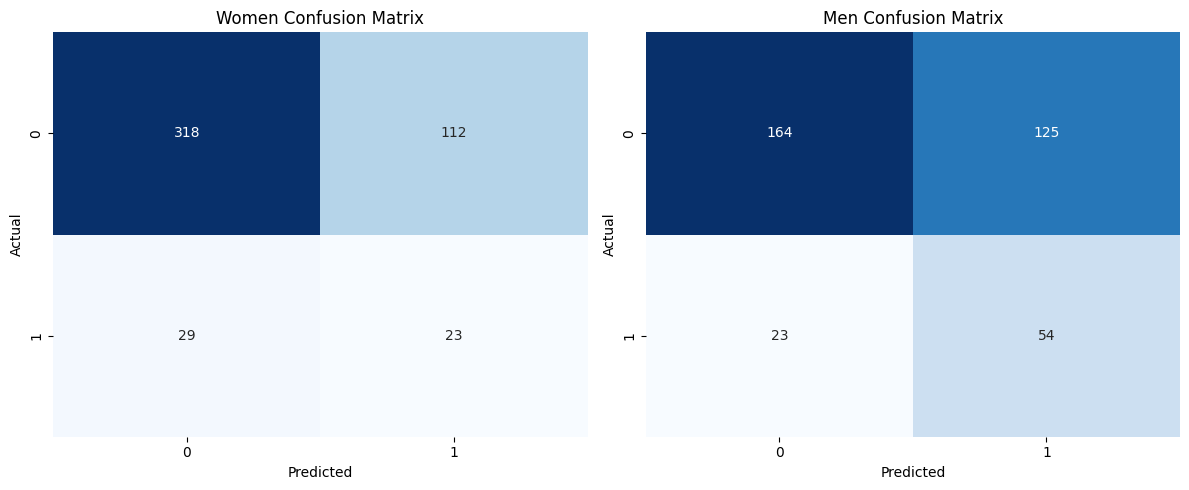

In [50]:
# create confusion matrix
confusion_matrix_women = confusion_matrix(women["actual"], women["pred"])
confusion_matrix_men = confusion_matrix(men["actual"], men["pred"])

print("Women Recall:", women_recall)
print("Men Recall:", men_recall)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix_women, annot=True, fmt="d", cmap="Blues",
            ax=axes[0], cbar=False)
axes[0].set_title("Women Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix_men, annot=True, fmt="d", cmap="Blues",
            ax=axes[1], cbar=False)
axes[1].set_title("Men Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [51]:
# false negative rate
fnr_women = 29 / (29 + 23)
fnr_men = 23 / (23 + 54)
print ("Women FNR:", fnr_women)
print ("Men FNR:", fnr_men)

Women FNR: 0.5576923076923077
Men FNR: 0.2987012987012987


In [52]:
# compute the AUC - overall
y_prob = model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_prob)
print(auc)

0.6919494129443349


In [54]:
# compute the AUC - based on gender
# create dataframe for convenience
eval_df = X_test.copy()
eval_df["actual"] = y_test.values
eval_df["prob"] = y_prob

women = eval_df[eval_df["male"] == 0]
men = eval_df[eval_df["male"] == 1]

auc_women = roc_auc_score(women["actual"], women["prob"])
auc_men = roc_auc_score(men["actual"], men["prob"])

print("Women AUC:", auc_women)
print("Men AUC:", auc_men)


Women AUC: 0.6717799642218247
Men AUC: 0.6736170403990474


In [55]:
# lower the threshold
threshold = 0.4
y_pred_04 = (y_prob >= threshold).astype(int)

In [56]:
# evaluate a lower threshold
eval_df["pred_04"] = y_pred_04

women_04 = eval_df[eval_df["male"] == 0]
men_04 = eval_df[eval_df["male"] == 1]

In [57]:
# compute recall with a 0.4 threshold
print("Women Recall (0.4):", recall_score(women_04["actual"], women_04["pred_04"]))
print("Men Recall (0.4):", recall_score(men_04["actual"], men_04["pred_04"]))

Women Recall (0.4): 0.6923076923076923
Men Recall (0.4): 0.8051948051948052


In [58]:
# compute false negative rate
def compute_fnr(df_group):
    cm = confusion_matrix(df_group["actual"], df_group["pred_04"])
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp)

print("Women FNR (0.4):", compute_fnr(women_04))
print("Men FNR (0.4):", compute_fnr(men_04))


Women FNR (0.4): 0.3076923076923077
Men FNR (0.4): 0.19480519480519481
